# Analyzing the Impact of Environmental Changes on UK Butterfly Populations

### Introduction

This notebook aims to document fluctuations in butterfly populations and how they correlate to warming temperatures and human encroachment by answering the following questions:
1. How have different UK butterfly species (farmland, habitat, non-specialist, woodland) populations changed over time, and can we identify any common trends among species with similar ecological niches or habitat preferences?
2. Is there a correlation between changes in butterfly populations and specific indicators of human encroachment (e.g., urbanization rates, agricultural land expansion) in the UK over the same period?
3. How does environmental changes, sepcifically temperature fluctuations, affect butterfly population?

### Background

Butterflies are known to be sensitive indicators of environmental change, making them excellent subjects for studying the effects of climate change and habitat loss on biodiversity. Additionally, as pollinators, butterflies play a key ecological role in supporting the reproduction of a number of plant species (flowering and not) and crop species as well. Butterflies are especially apt at promoting genetic diversity among the plants they pollinate because they are uniquly advantaged to fly longer distances, compared to other pollinators like bees. Overall, considering their shorter life spans which make them sensitive indicators of environmental changes, the important ecological role they play, and even the role butterflies play in promoting the success of crops and the agricultural sector, studying them within the context of climate change is vital. Understanding how their populations fluctuate and knowing how that correlates to environmental health and what the corresponding consequences might be can inform how ecosystems, and economic sectors might be impacted.   

As such, with the support of data sourced from the UK Butterfly Monitoring Scheme, this project aims to investigate the relationship between environmental changes and the population trends of a variety of butterfly species in the United Kingdom. Specifically, we aim to illustrate how different butterfly species have responded to environmental pressures over time. 

### Data 

To address this topic, we will need data on butterfly populations in the United Kingdom, climate and temperature data, urban population data, and information on conservation efforts in the United Kingdom during overlapping time periods. 

Specifically, we will use data gathered by the UK Butterfly Monitoring Scheme (UKBMS) and sourced from NBN Atlas:

https://records.nbnatlas.org/occurrences/search?q=data_resource_uid%3Adr1206&fq=-occurrence_status%3A%22absent%22&fq=data_resource_uid%3A%22dr1206%22&fq=basis_of_record%3A%22HumanObservation%22&nbn_loading=true#tab_overview

This dataset provides information on the population changes of a variety of UK butterfly species over time. For this project, we have specficically chosen to analyse the populations of six of the most common butterfly species in the United Kingdom, including the Small White (Pieris rapae), Peacock (Aglais io), Red Admiral (Vanessa atalanta), Common Blue (Polyommatus icarus), Speckled Wood (Pararge aegeria), and the Comma (Polygonia c-album). 

We will supplement this data with additional information on climate trends, urban population data, and conservation efforts in the UK during the same period. Specifically, we plan to make use of the following supplemental resources for this information:
- Average monthly weather in United Kingdom (1884-2024): https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt
- Urban population data: https://www.macrotrends.net/global-metrics/countries/gbr/united-kingdom/urban-population#google_vignette

In [1]:
# Importing the necessary libraries

import pandas as pd
import ibis
from ibis import _
import ibis.selectors as s

import seaborn.objects as so
import matplotlib.pyplot as plt

!pip install lxml
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

con = ibis.duckdb.connect()

## Reading in the Data
In this notebook, we will make use of three datasets:
1. Butterfly population data sourced from the UK Butterfly Monitoring Scheme
2. Weather data sourced from the Met Office
3. Urbanization rates data sourced from Macrotrends

### 1) Butterfly Population Data
To examine butterfly populations in the United Kingdom, we selected the six most common butterfly species in the UK to demonstrate trends in butterfly populations as well as to conduct our data analysis on. 

Specificially, we examined the following butterfly species:
1. **Small White (Pieris rapae)**

   Habitat:
   - Prevalend in gardens and farmland
   - Particularly found in areas where cabbage and produce within the cabbage family are found
   - Found in lower elevations

   Life Cycle:
   - Reproduces at least twice a season, when temperatures are warmer
   - The first generation of Small Whites emerge in the spring (March - May) with a second generation emerging during the summer
3. **Peacock (Aglais io)**

   Habitat:
   - Prevalent in woods, fields, meadows, parks, and gardens
   - Found in elevations below 2500m 

   Life Cycle:
   - Hibernates during the winter
   - Lays eggs during the spring 
5. **Red Admiral (Vanessa atalanta)**

   Habitat:
   - Prevalent in gardens, woodland, and open countrysides
   - Most common in areas where buddleia, hebes, heathers, and ivy grow

   Life Cycle:
   - Migrates to the British Isles from North Africa and continental Europe predominantly from April - June   
   - Caterpillars and adult Red Admiral butterflies have started overwintering in southern parts of the UK as temperatures warm
7. **Common Blue (Polyommatus icarus)**

   Habitat:
   - Prevalent in coastal dunes, undercliffs, and woodland clearings
   - Also found in urban settings such as cemetaries, quarries, and golf courses 

   Life Cycle:
   - Two generations emerge per year, with the first generation emerging from May - June and the second emerging from August - September
   - Adults live for about three weeks 
9. **Speckled Wood (Pararge aegeria)**

   Habitat:
   - Prevalent in partially shaded woodlands with mild sunlight, gardens, hedgerows, and parks
   - Typically found in closed-canopy shaded habitats

   Life Cycle:
   - Can overwinter as both larva and pupa
   - Adults emerge from April through September, with some appearing in March or October in southern locations
   - Produces two or three generations annually, depending on location and weather
11. **Comma (Polygonia c-album)**

    Habitat:
    - Prevalent at the edge of woodlands in sunny but damp locations
    - Can also be found in gardens, quarries, and coastal areas during the summer

    Life Cycle:
    - Has two generations per year
    - Eggs develop slowly, as once they are laid in the spring, they only hatch during mid-June

*Aside About the Data & Filtering Methodologies:*

*The data sourced from the UK Butterfly Monitoring Scheme consisted of over 8,000,000 data points documenting population data for 64 distinct butterfly species from 1972 to 2019. Evidently, processing over 8 million datapoints is a challenging and time consuming task, so we decided to focus on the six most common butterfly species in the United Kingdom with which to observe trends in population changes.*

In [2]:
# UK Butterfly Monitoring Scheme

# Reading in our data using Pandas

# Specify columns of interest to manage large data files 
columns = ['Occurrence ID', 'Scientific name', 'Common name', 'Start date', 'Latitude (WGS84)', 'Longitude (WGS84)']

# Reading in data for different date ranges 
date_range_1 = pd.read_csv("date_range_1_csv.csv", usecols = columns)
date_range_2 = pd.read_csv("date_range_2_csv.csv", usecols = columns)
date_range_3 = pd.read_csv("date_range_3_csv.csv", usecols = columns)
date_range_4 = pd.read_csv("date_range_4_csv.csv", usecols = columns)
date_range_5 = pd.read_csv("date_range_5_csv.csv", usecols = columns)
date_range_6 = pd.read_csv("date_range_6_csv.csv", usecols = columns)

data_frames = [date_range_1, date_range_2, date_range_3, date_range_4, date_range_5, date_range_6]

# Stitching together out data tables into one dataframe
butterflies = pd.concat(data_frames, axis = 0).drop_duplicates()

# Renaming our columns
butterflies = butterflies.rename(columns = {'Occurrence ID': 'occurence_ID', 'Scientific name': 'scientific_name', 'Common name' : 'common_name', 'Start date' : 'start_date', 'Latitude (WGS84)' : 'latitude', 'Longitude (WGS84)' : 'longitude'})

# Converting the start_date column to datetime
butterflies['start_date'] = pd.to_datetime(butterflies['start_date'])

In [3]:
# Converting from pandas to ibis
butterflies_2 = con.create_table('butterflies_2', butterflies, overwrite=True)
butterflies_2.head().execute()

,occurence_ID,scientific_name,common_name,start_date,latitude,longitude
0,816212,Pieris rapae,Small White,1986-10-04,52.188575,-2.198891
1,819380,Pararge aegeria,Speckled Wood,1986-10-08,52.188575,-2.198891
2,1588658,Pieris rapae,Small White,1986-10-02,50.983895,-1.951513
3,819437,Pararge aegeria,Speckled Wood,1986-10-15,52.188575,-2.198891
4,3218309,Pararge aegeria,Speckled Wood,1986-10-01,51.075138,0.846499


### 2) Urbanization Rates Data

We used data on urbanization rates to understand what human encroachment looks like 

In [4]:
columns = ["year", "urban_population", "percent_of_total_population", "annual_percentage_change"]
population = con.read_csv("united-kingdom-urban-population.csv", 
                         sep = ",", names = columns, )
population = (population
              .mutate(year=population['year'].cast('timestamp').year())
              #.filter(_.year >= 1975)
             )
population.execute(5)

,year,urban_population,percent_of_total_population,annual_percentage_change
0,1960,41104656,78.444,NaN
1,1961,41381472,78.374,0.6712
2,1962,41661202,78.237,0.6737
3,1963,41900114,78.099,0.5718
4,1964,42098400,77.960,0.4721


### 3) Weather Data

In [5]:
# read with pandas
import pandas as pd
columns = ["year", "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december", "winter", "spring", "summer", "autumn", "annual"]
temp = pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt",
                    skiprows=6, 
                    sep='\s+', 
                    names = columns,
                    skipinitialspace=True, 
                    na_values=['---'])

# convert to ibis
import ibis
con = ibis.duckdb.connect()
temp = con.create_table("temp", temp, overwrite=True)

# convert celsius to fahrenheit
temperature_columns = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december", "winter", "spring", "summer", "autumn", "annual"]
temp_fahrenheit = temp.mutate(
    **{col: (temp[col] * 9 / 5 + 32).name(f"{col}_f") for col in temperature_columns})

# Execute and display the updated table
temp_fahrenheit.execute()

,year,january,february,march,april,may,june,july,august,september,october,november,december,winter,spring,summer,autumn,annual
0,1884,41.00,39.56,41.18,43.16,49.46,54.50,58.10,59.54,55.40,46.94,40.28,37.940,NaN,44.564,57.398,47.516,47.264
1,1885,35.60,39.56,38.30,43.88,45.68,54.14,58.10,54.32,51.62,43.16,40.64,37.400,37.652,42.656,55.562,45.104,45.248
2,1886,33.98,33.44,37.22,43.34,47.84,53.42,57.56,57.38,53.60,49.82,42.26,34.160,35.024,42.818,56.156,48.560,45.410
3,1887,35.78,38.30,37.94,41.72,47.66,57.74,60.08,57.20,51.08,43.52,39.02,35.780,36.014,42.440,58.298,44.546,45.518
4,1888,37.04,33.98,35.78,41.54,48.56,53.24,54.14,55.04,52.16,45.68,43.70,39.740,35.654,42.008,54.158,47.174,45.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2020,42.08,41.18,42.08,48.38,52.34,57.20,57.74,60.62,55.04,48.92,45.86,39.740,41.504,47.624,58.568,49.964,49.316
137,2021,35.96,39.38,43.52,42.26,48.38,57.56,61.88,59.00,58.46,51.62,44.60,41.540,38.318,44.726,59.504,51.512,48.704
138,2022,40.46,42.08,44.06,46.58,53.24,57.02,61.70,61.88,56.12,52.88,46.76,37.220,41.324,47.966,60.278,51.890,50.054
139,2023,39.92,42.44,42.26,46.04,52.88,60.44,59.00,59.54,59.36,51.26,43.34,42.440,39.776,47.066,59.648,51.332,49.946


## Part I: Butterfly Population Changes 

**How has the population of different UK butterfly species changed over time?**

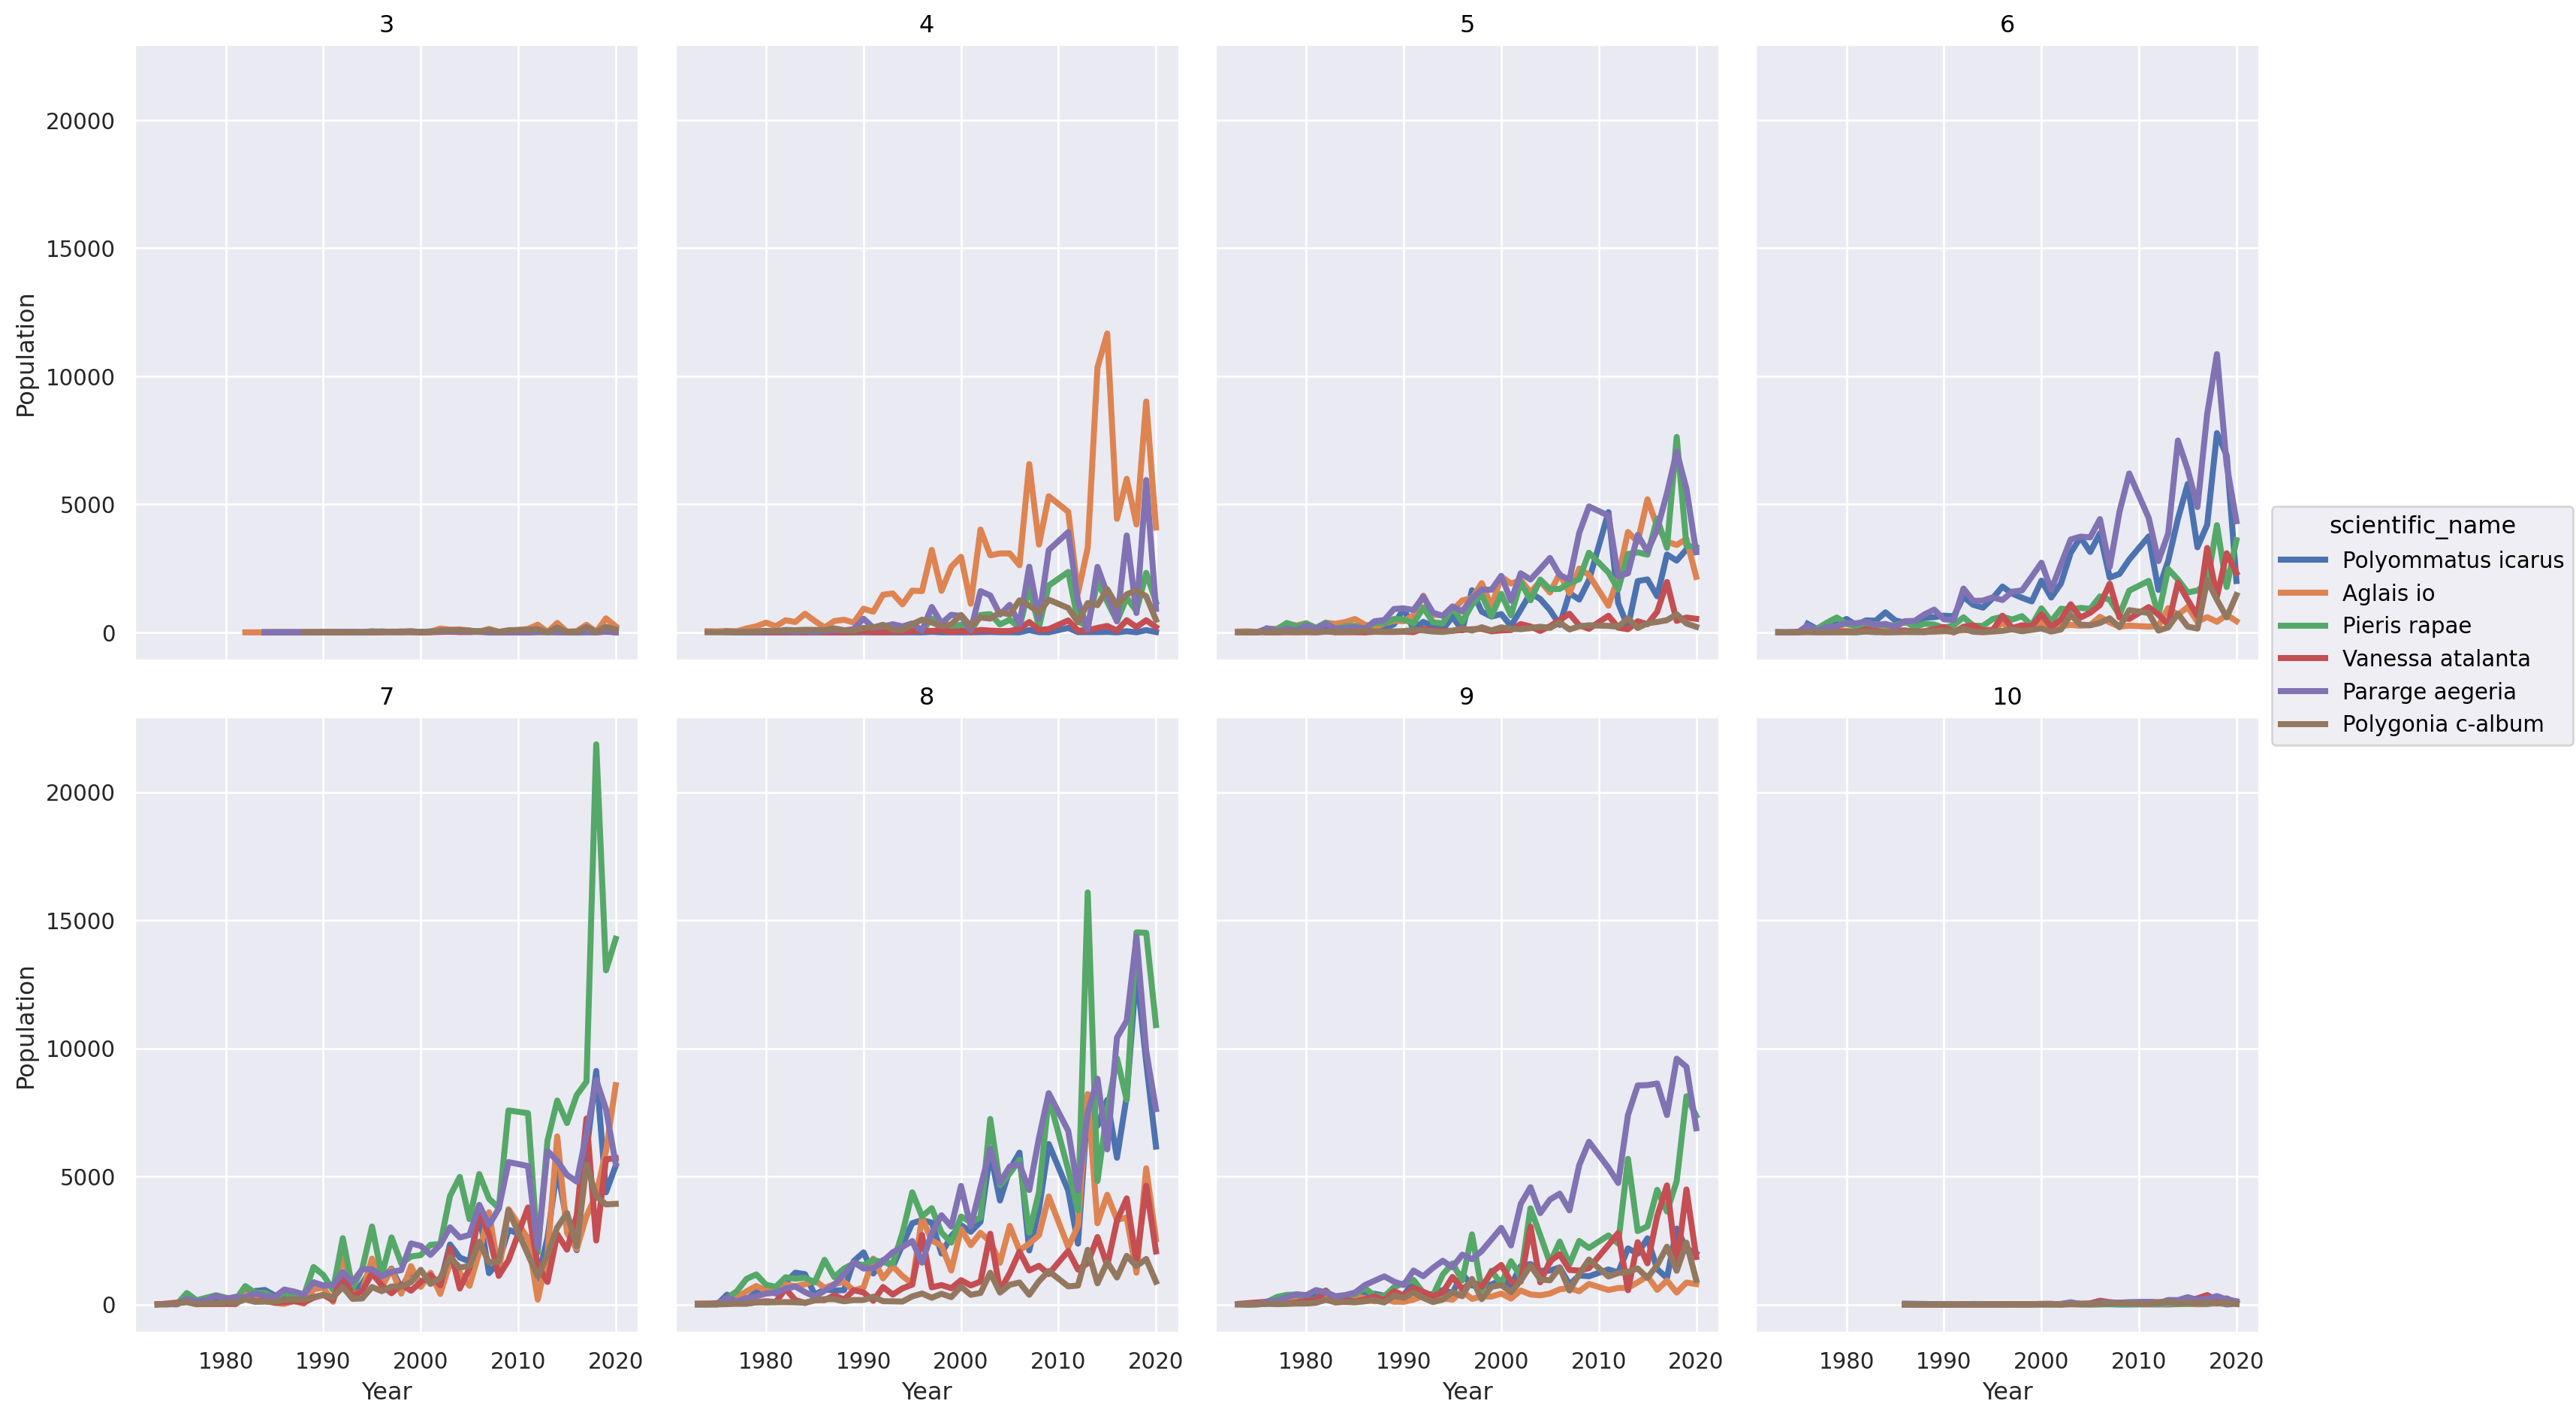

In [6]:
# Graphing butterfly popylations by month

# Creating columns for year, month, and day
butterflies_2 = butterflies_2.mutate(
    start_date = butterflies_2.start_date.strftime('%Y-%m-%d').cast('timestamp')
)

butterflies_2 = butterflies_2.mutate([
    butterflies_2.start_date.year().name('year'),
    butterflies_2.start_date.month().name('month'),
    butterflies_2.start_date.day().name('day')
])

# Graphing populations by month
pop_by_month = (
    butterflies_2
    .group_by(_.scientific_name, _.month, _.year)
    .agg(pop_sum = _.scientific_name.count())
)

(
    so.Plot(pop_by_month, 
            x = "year", 
            y = "pop_sum", 
            color = "scientific_name",
            group = "month")
    .add(so.Lines(linewidth = 3))
    .facet("month", wrap = 4)
    .layout(size = (16, 10))
    .label(x = "Year", y = "Population")
)

In [7]:
species_counts = (
    butterflies_2
    .group_by(['year', 'common_name'])
    .aggregate(count=butterflies_2.common_name.count())
)
species_counts.execute()

,year,common_name,count
0,1995,Common Blue,7026
1,2001,Speckled Wood,10292
2,2001,Red Admiral,3134
3,1994,Speckled Wood,7469
4,1993,Small White,3322
...,...,...,...
276,1973,Comma,21
277,1983,Common Blue,2364
278,1975,Small White,73
279,1974,Common Blue,4


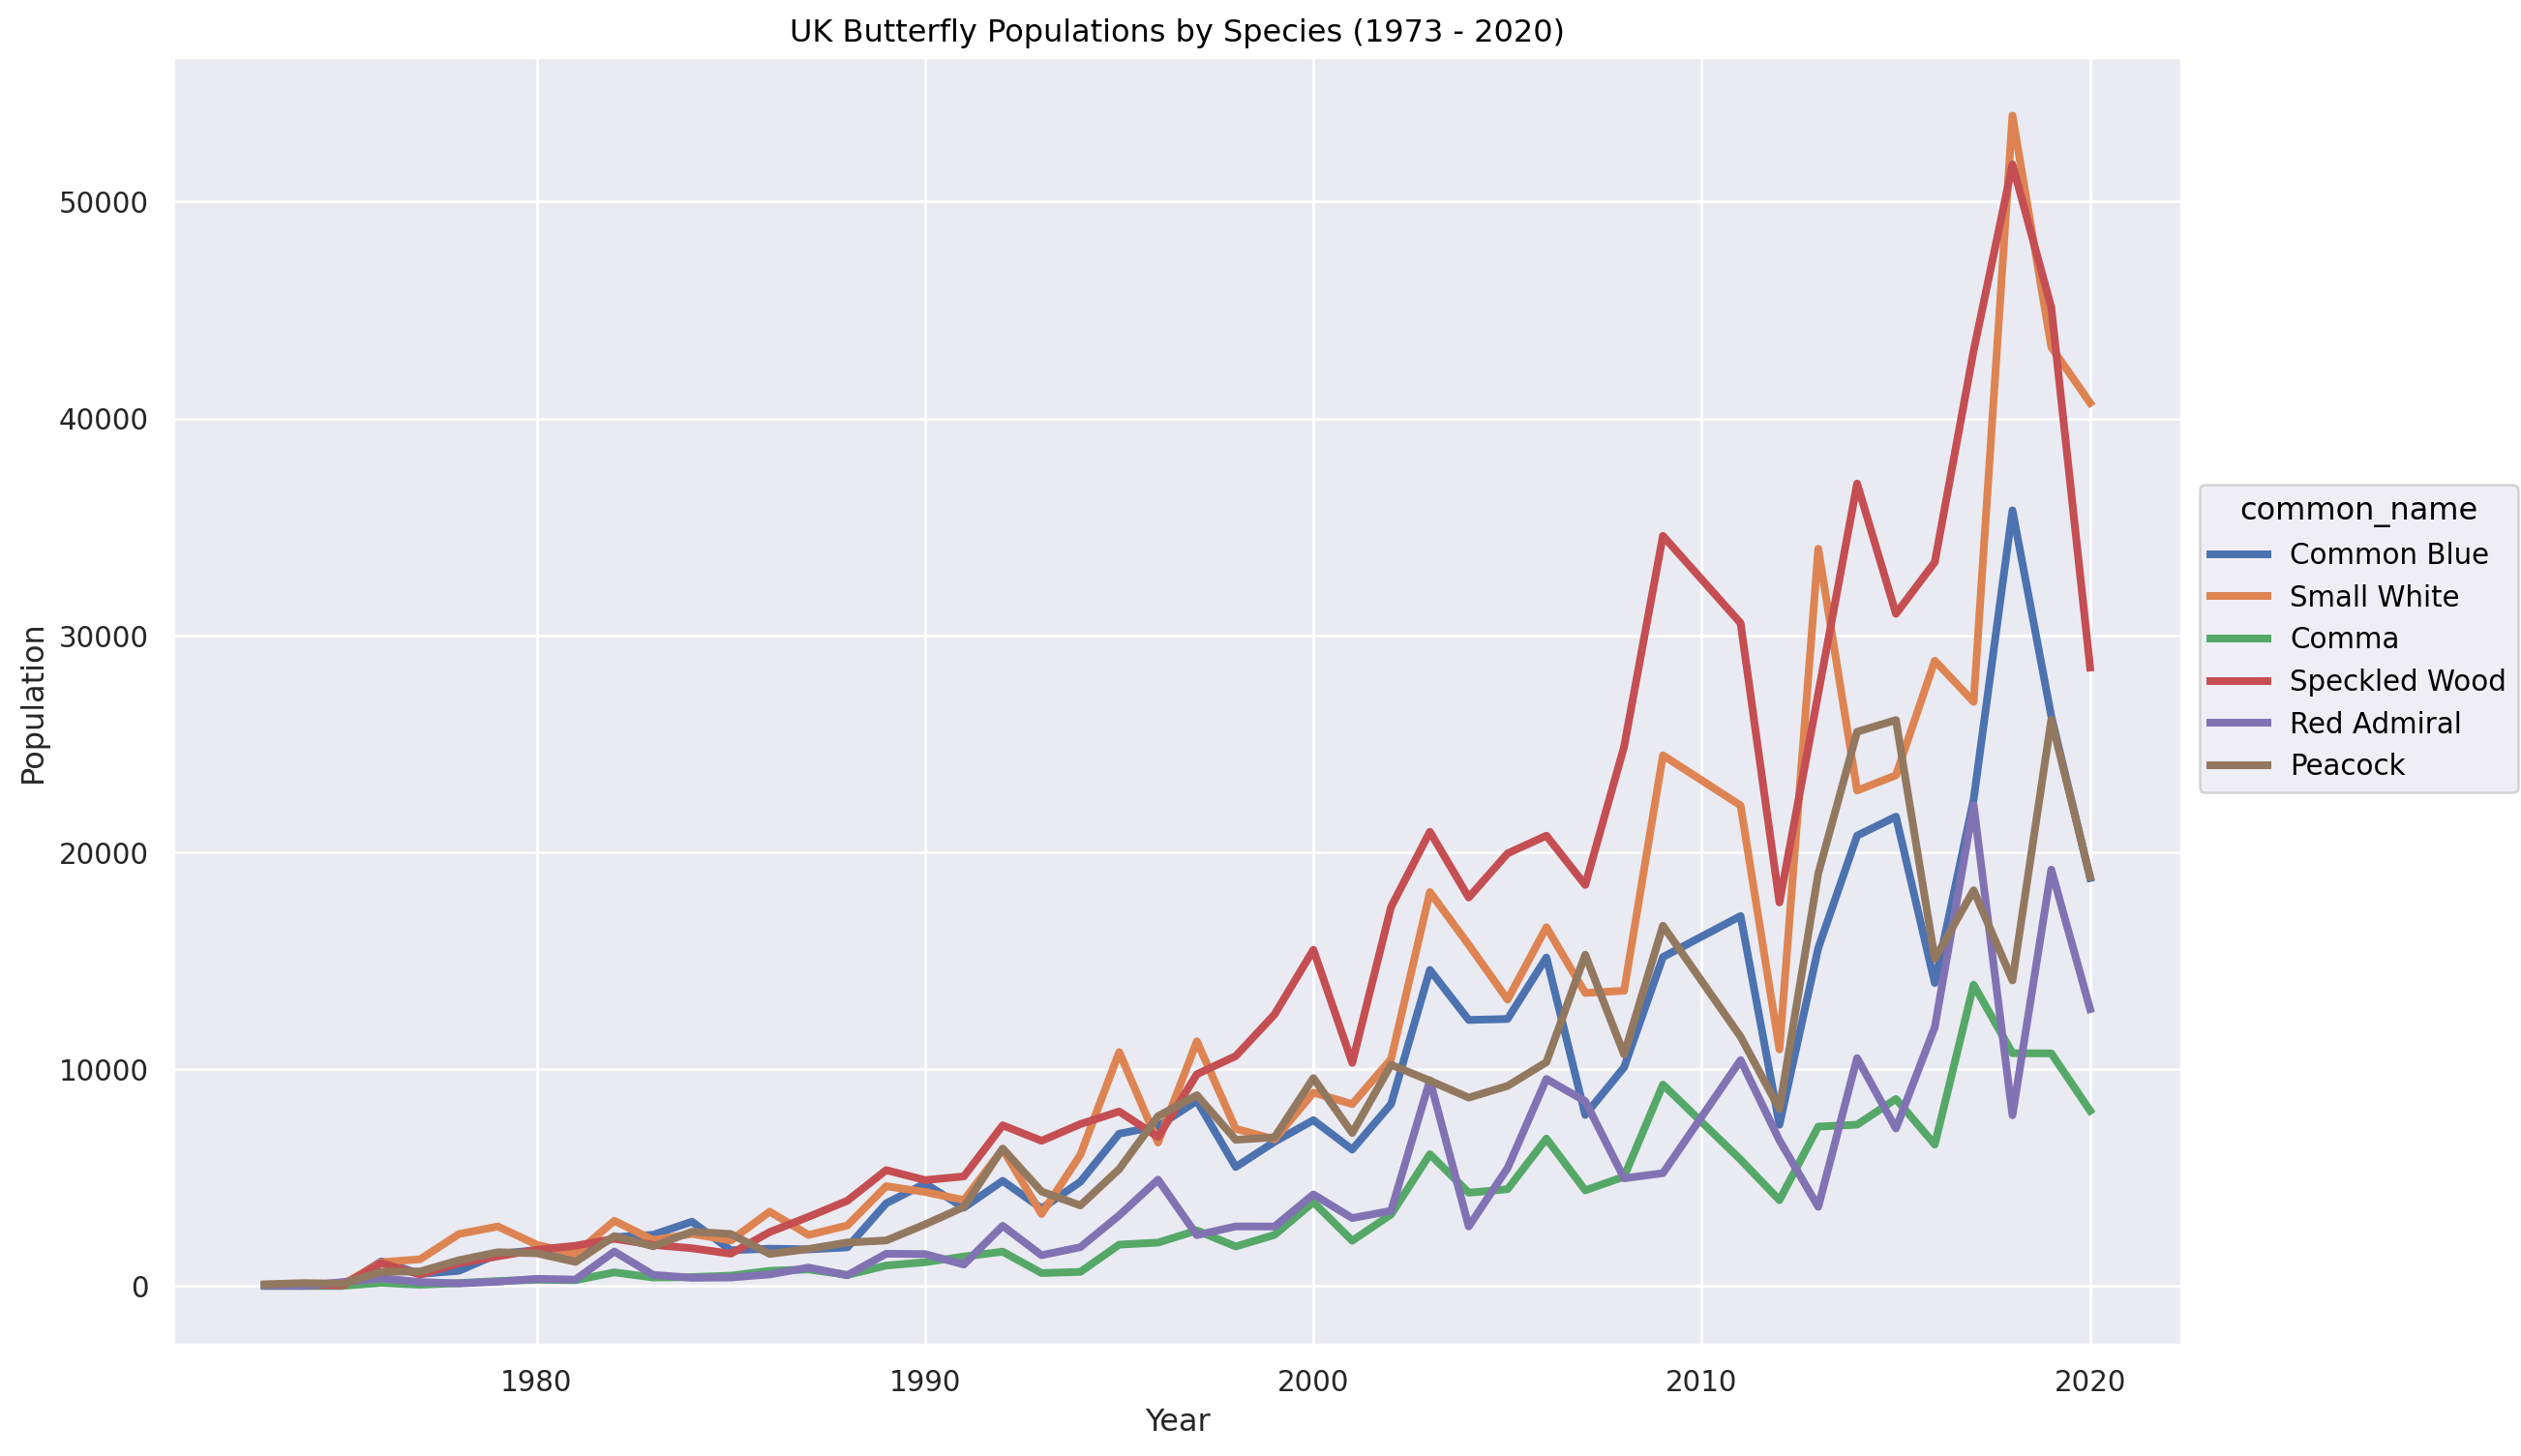

In [8]:
(
    so.Plot(species_counts, 
        x = "year",
            y="count",
            color = "common_name")
    .add(so.Lines(linewidth=3))
    .layout(size=(12, 8))
    .label(x = "Year", y = "Population", title = "UK Butterfly Populations by Species (1973 - 2020)")
)

In [9]:
species_counts2 = (species_counts.filter(_.year >= 2000))
species_counts2.execute()

,year,common_name,count
0,2001,Speckled Wood,10292
1,2000,Speckled Wood,15505
2,2000,Red Admiral,4225
3,2002,Peacock,10205
4,2002,Small White,10463
...,...,...,...
115,2014,Common Blue,20767
116,2019,Comma,10728
117,2017,Comma,13895
118,2017,Common Blue,22430


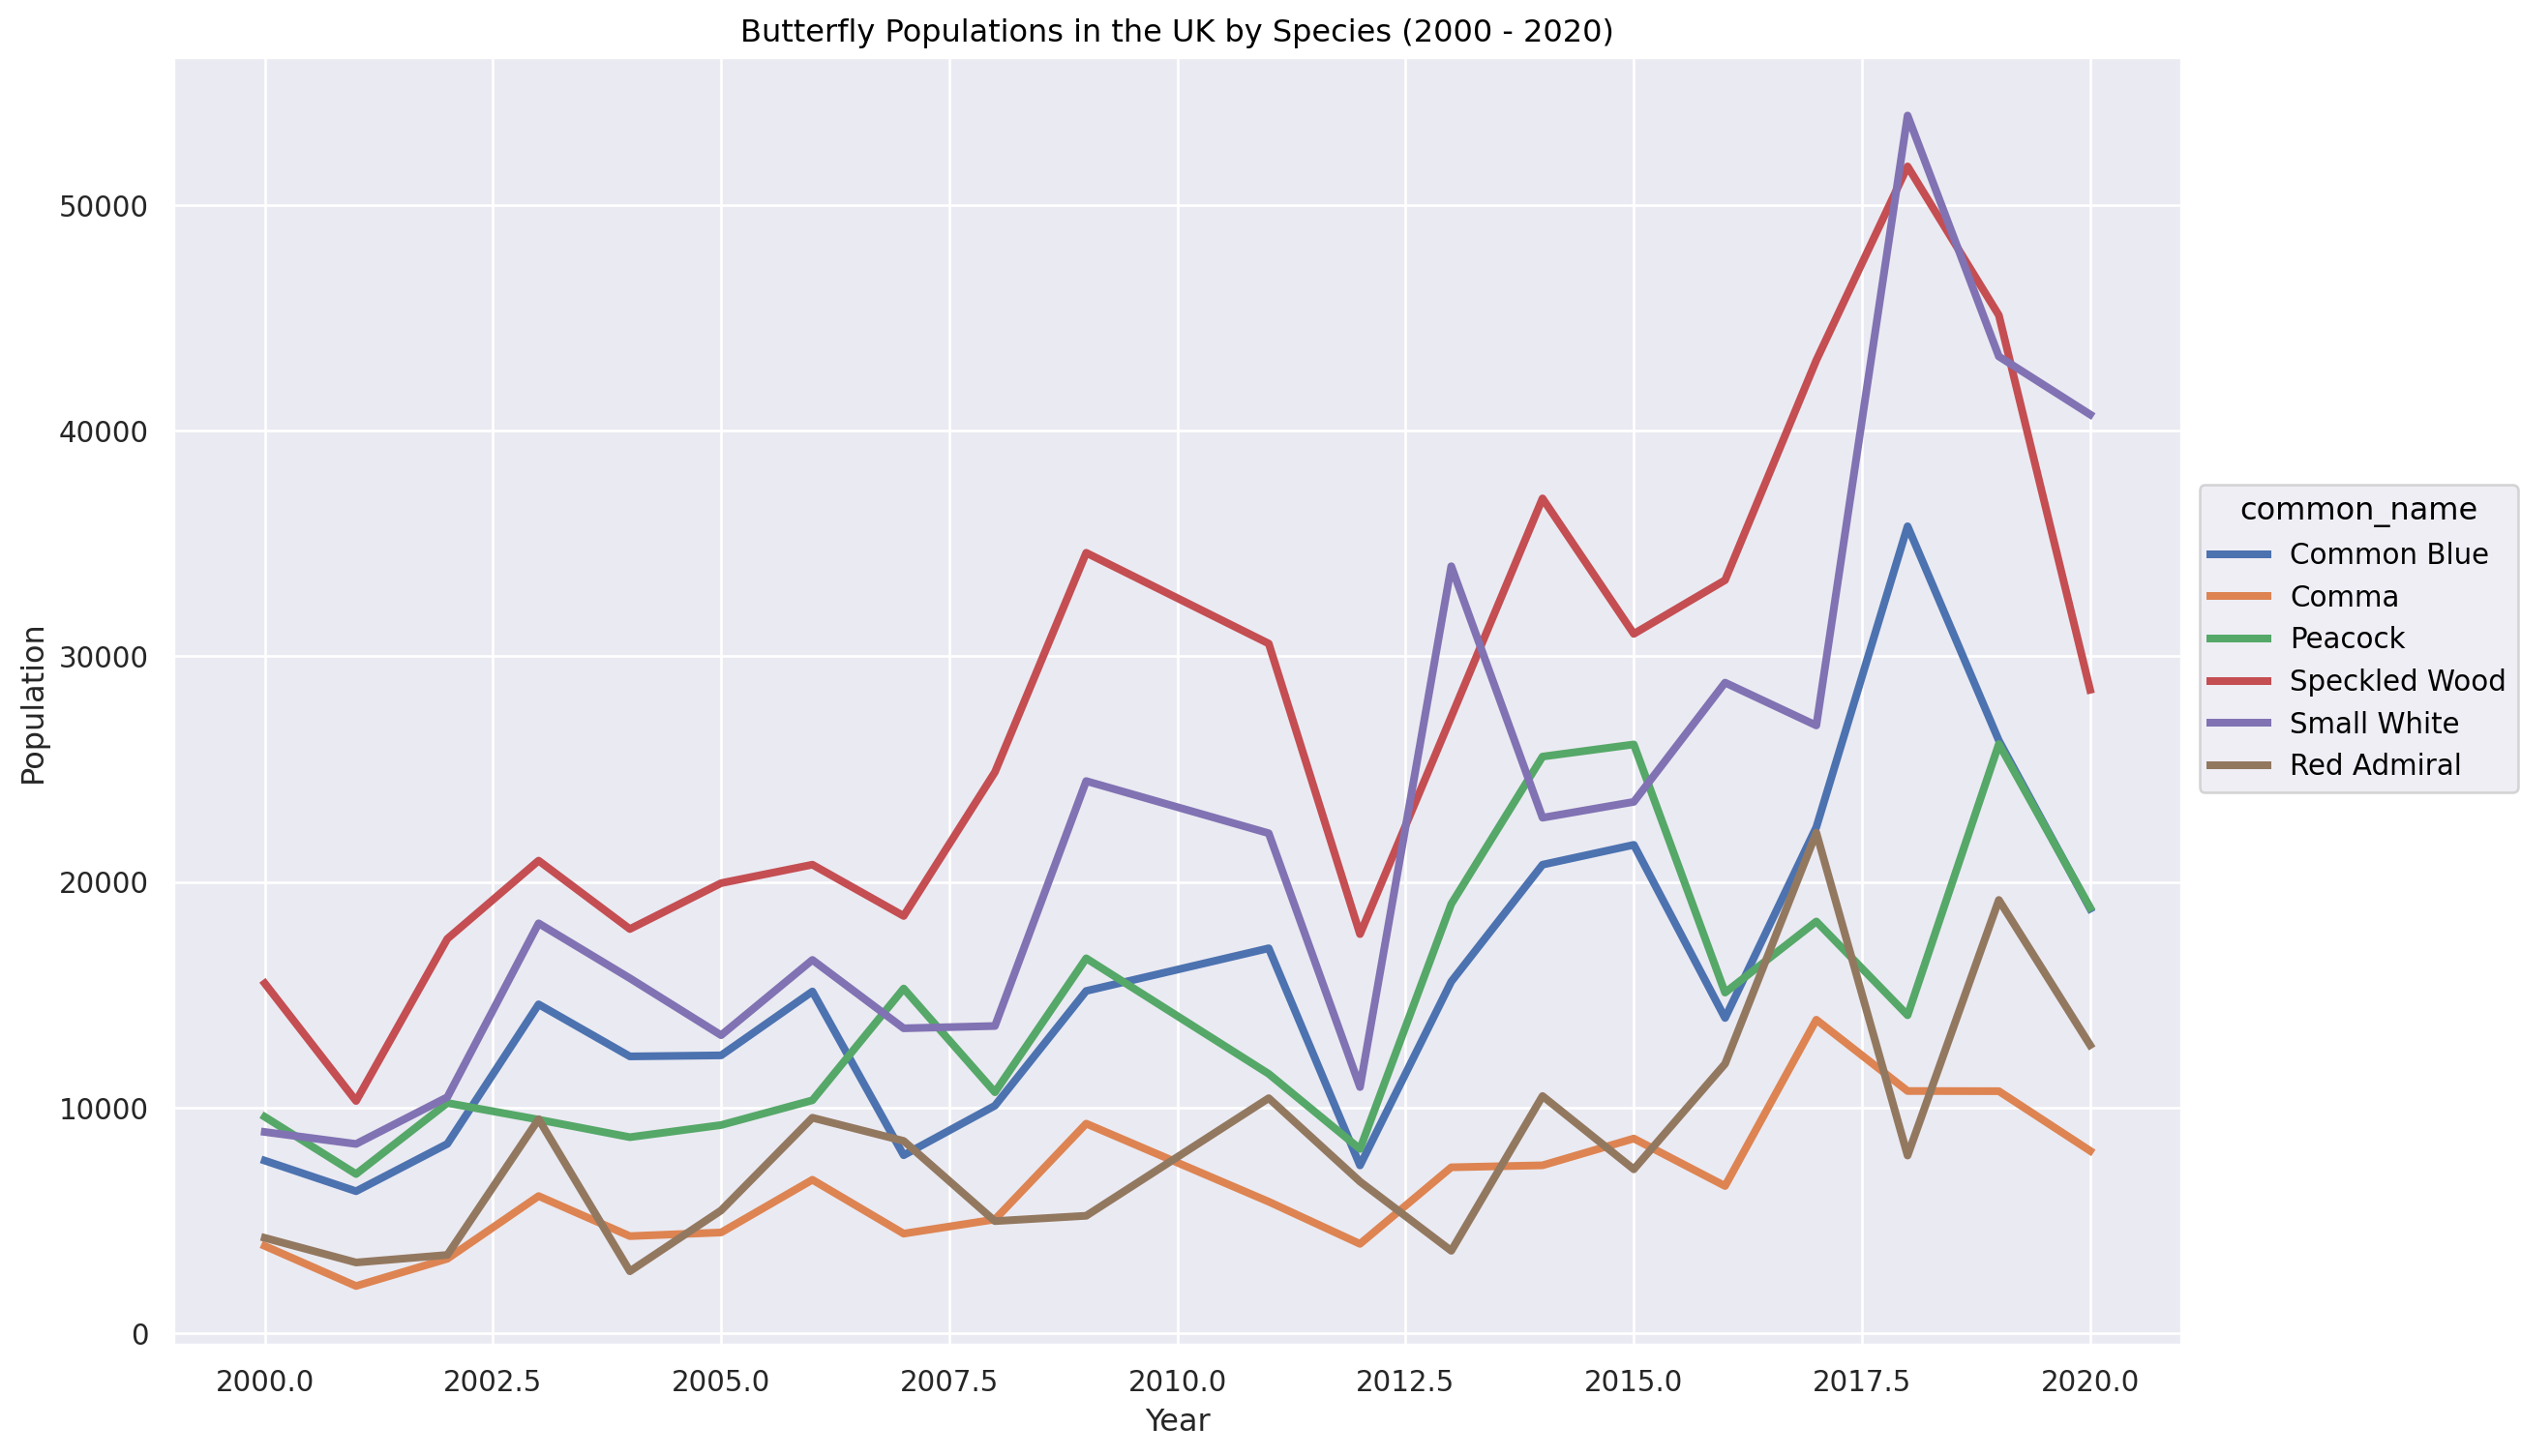

In [10]:
(
    so.Plot(species_counts2, 
            x = "year",
            y="count",
            color = "common_name")
    .add(so.Lines(linewidth=3))
    .layout(size=(12, 8))
    .label(x = "Year", y = "Population", title = "Butterfly Populations in the UK by Species (2000 - 2020)")
)

In [11]:
total = (
    butterflies_2
    .group_by(_.year)
    .aggregate(total_count=butterflies_2.occurence_ID.count())
    .order_by(_.year)
)
total.head().execute()

,year,total_count
0,1973,232
1,1974,231
2,1975,234
3,1976,4461
4,1977,3242


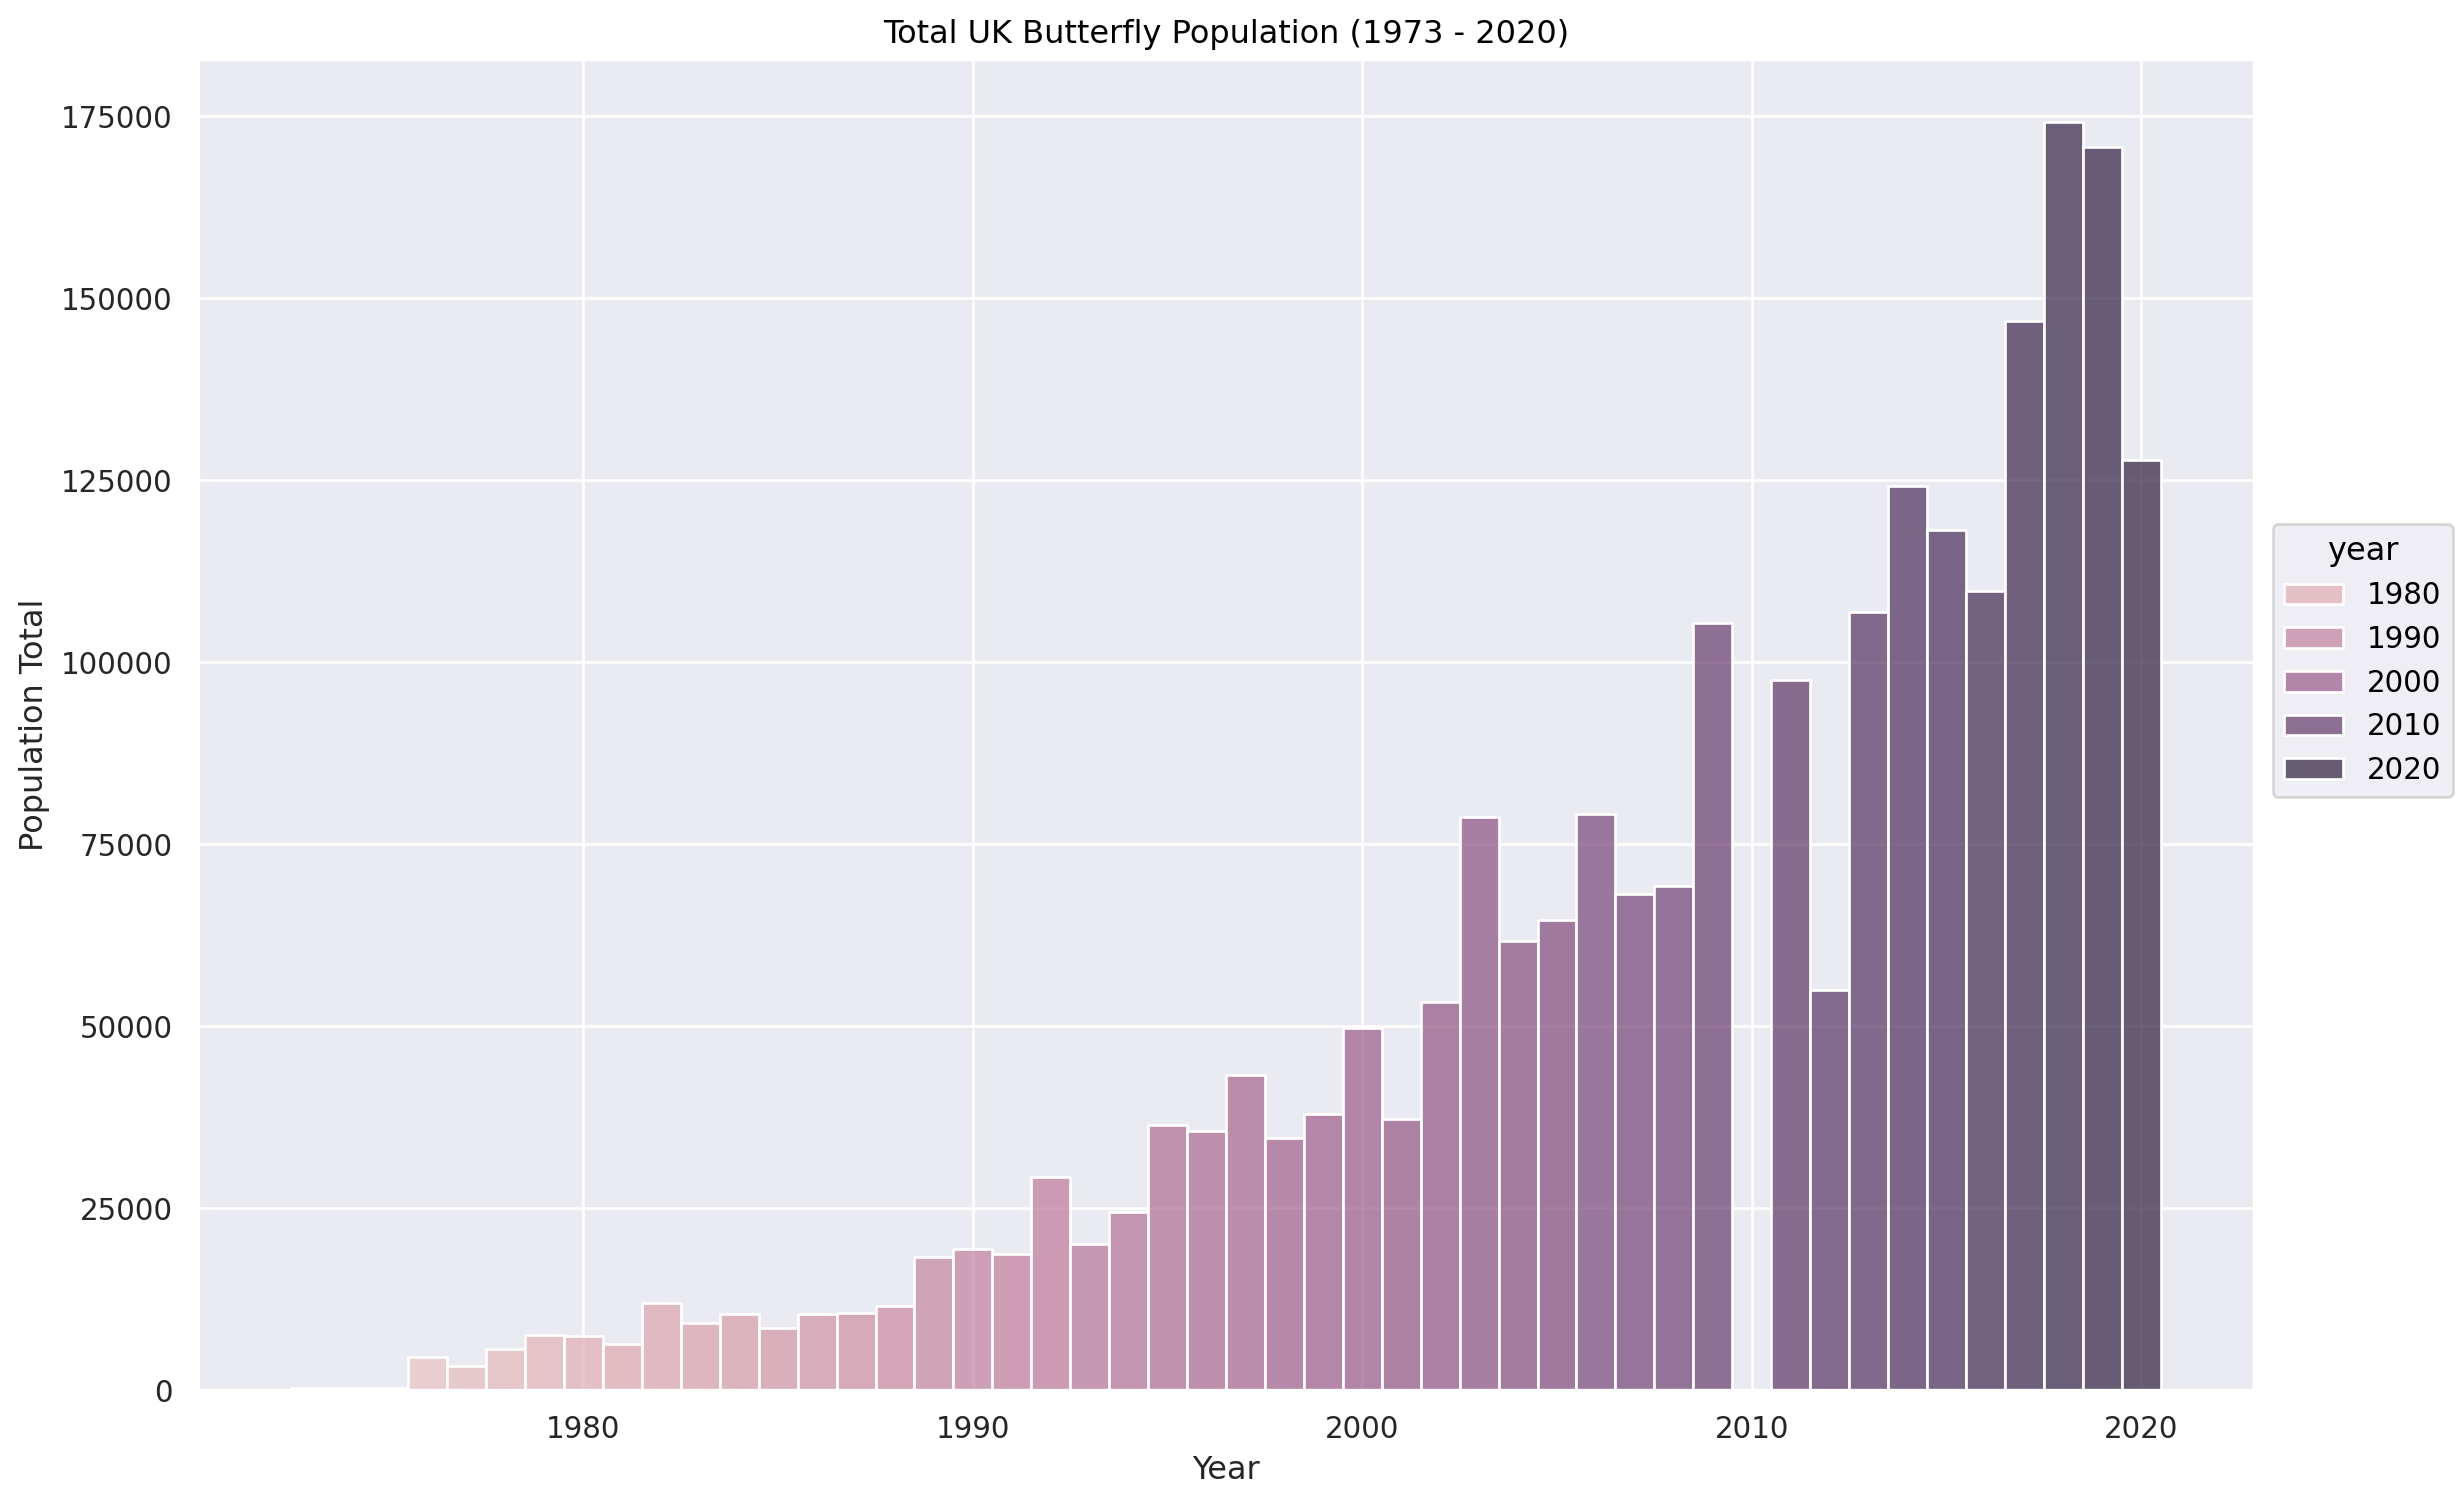

In [12]:
(
    so.Plot(total, 
        x = "year",
            y="total_count",
            color = "year")
    .add(so.Bars())
    .layout(size=(12, 8))
    .label(x = "Year", y = "Population Total", title = "Total UK Butterfly Population (1973 - 2020)")
)

### Analysis
The visual graphs above reveal an overall increasing trend in UK butterfly populations across species. However, a closer examination highlights significant population declines during specific years, notably in 2011, 2012, 2019, and 2020.

The period between 2010 and 2012 coincided with substantial urbanization in major cities across the United Kingdom. These changes likely contributed to habitat loss and fragmentation, which can significantly impact butterfly populations, particularly species reliant on specific plants and undisturbed habitats.

## Part II: Human Encroachment

**Is there a correlation between changes in butterfly populations and specific indicators of human encroachment (e.g., urbanization rates, agricultural land expansion) in the UK over the same period?**

Urbanization rates indicate the shift away from rural living as people come together in densely populated cities. The United Kingdom is much more urban than the worldwide average, as we can see in the graph located in this website: https://www.statista.com/statistics/270860/urbanization-by-continent/

To study the impact and potential correlation between urbanziation and the UK Butterfly species population, we can look at the urban population data in the UK. 

https://www.macrotrends.net/global-metrics/countries/gbr/united-kingdom/urban-population

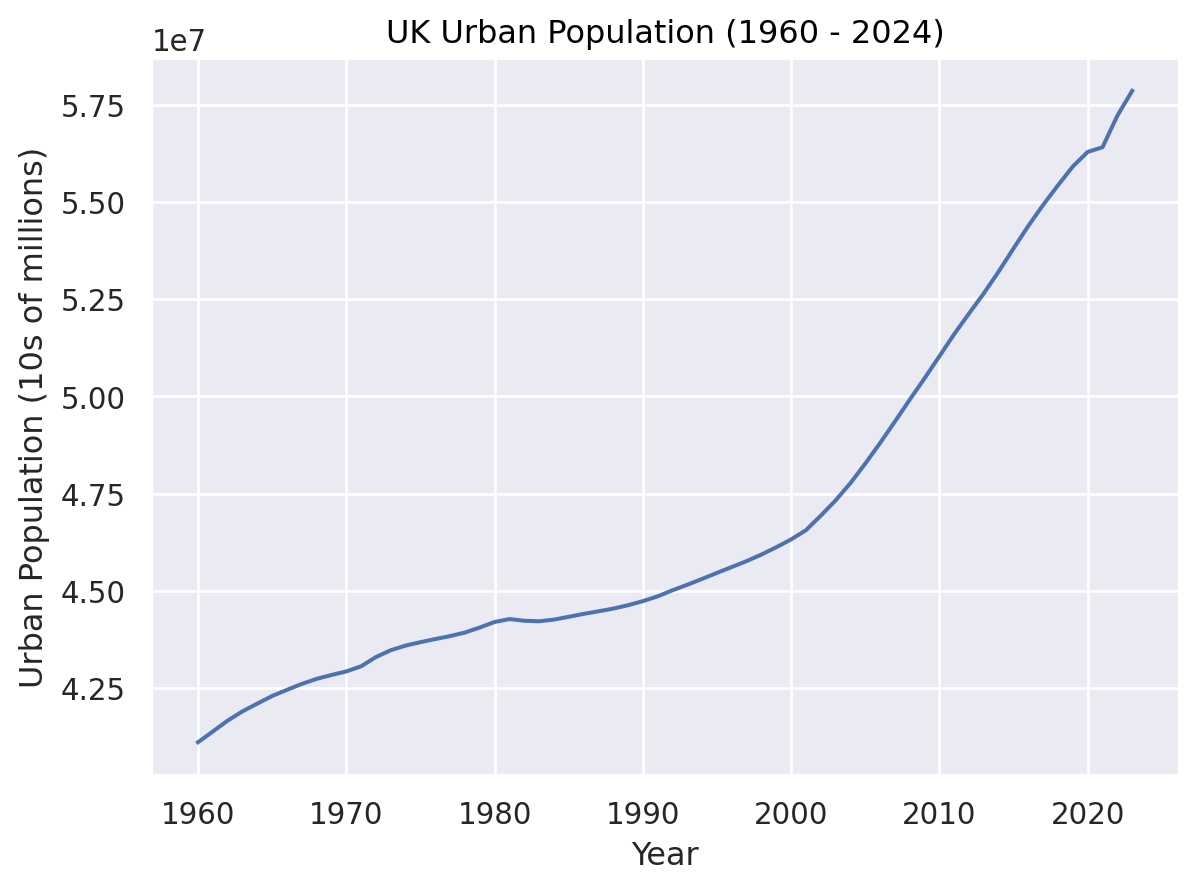

In [13]:
(
    so.Plot(population, x = "year", y = "urban_population")
    .add(so.Lines())
    .label(x="Year", y="Urban Population (10s of millions)", title = "UK Urban Population (1960 - 2024)")
)

The above graph depicts the UK population that lives in urban settings.

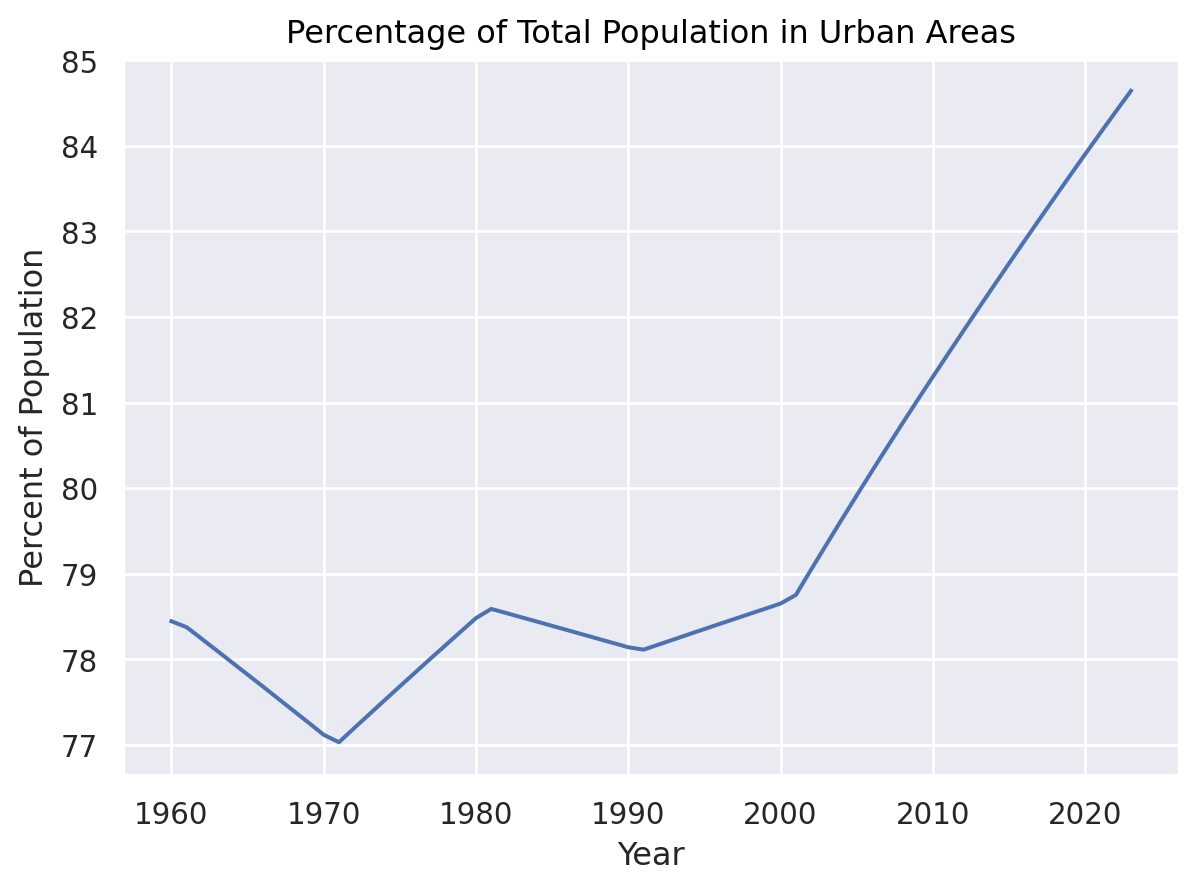

In [14]:
(
    so.Plot(population, x = "year", y = "percent_of_total_population")
    .add(so.Lines())
    .label(x = "Year", y = "Percent of Population", title = "Percentage of Total Population in Urban Areas")
)

The graph above depicts the percentage of the total UK population that lives in urban areas.

In [15]:
butterflies_all_cols = (con
        .read_parquet("s3://us-west-2.opendata.source.coop/cboettig/gbif/2024-10-01/**")
        .filter(_.year.between(1960, 2024), 
                _.countrycode == "GB", 
                _.order == "Lepidoptera",
                _.basisofrecord == "HUMAN_OBSERVATION",
                _.institutioncode == "UKBMS", # UK Butterfly Monitoring Scheme (UKBMS) 
               )
       )

In [16]:
butterflies_coordinates = (
    butterflies_2
    .mutate(coordinates = _.latitude.cast('string') + ', ' + _.longitude.cast('string'))
)
butterflies_coordinates.head().execute()

,occurence_ID,scientific_name,common_name,start_date,latitude,longitude,year,month,day,coordinates
0,816212,Pieris rapae,Small White,1986-10-04,52.188575,-2.198891,1986,10,4,"52.188575, -2.198891"
1,819380,Pararge aegeria,Speckled Wood,1986-10-08,52.188575,-2.198891,1986,10,8,"52.188575, -2.198891"
2,1588658,Pieris rapae,Small White,1986-10-02,50.983895,-1.951513,1986,10,2,"50.983895, -1.951513"
3,819437,Pararge aegeria,Speckled Wood,1986-10-15,52.188575,-2.198891,1986,10,15,"52.188575, -2.198891"
4,3218309,Pararge aegeria,Speckled Wood,1986-10-01,51.075138,0.846499,1986,10,1,"51.075138, 0.846499"


In [17]:
cb_loc_year = (
    butterflies_coordinates
    .filter(_.common_name == "Common Blue")
    .group_by(_.coordinates, _.year)
    .agg(population = _.common_name.count())
)

cb_loc_year.execute()

,coordinates,year,population
0,"50.983895, -1.951513",1986,41
1,"51.303871, 1.37721",1984,117
2,"51.458795, -2.627497",1986,2
3,"51.171084, 0.966865",1987,68
4,"52.242336, -2.287003",1987,7
...,...,...,...
18711,"50.244913, -4.953717",2019,1
18712,"51.181293, -1.679482",2019,1
18713,"52.655059, 1.613601",2017,1
18714,"50.839735, -1.738633",2019,1


In [18]:
url = "https://geokeo.com/database/city/gb/"
cities_pd = pd.read_html(url)[0]

cities_pd = cities_pd.rename(columns = {
    'Name': 'city',
    'Latitude': 'latitude',
    'Longitude': 'longitude'
})

cities = con.create_table('cities', cities_pd, overwrite=True)

In [19]:
def create_location_scatter_plot(ibis_df, coord_col, z_col, year_col, year, cities):
    df = ibis_df.execute()
    df = df[df[year_col] == year]
    df[['x', 'y']] = df[coord_col].str.split(',', expand=True).astype(float)

    plt.figure(figsize=(15, 12))
    plt.scatter(df['y'],df['x'], 
                c=df[z_col], 
                cmap='binary', 
                alpha=0.8, 
                s=10,  
                edgecolors='none')

    plt.colorbar(label=z_col)
    
    city_data = cities.execute()
    
    for _, city in city_data.iterrows():
        plt.scatter( city['longitude'], city['latitude'],
                    color='red', 
                    s=300,  # Larger size for city markers
                    alpha=0.7, 
                    edgecolor='black', 
                    linewidth=2,
                    zorder=100)  # Ensure cities are on top
 
        plt.annotate(city['city'], 
                     (city['longitude'], city['latitude']), 
                     xytext=(10, 10),  # Offset text
                     textcoords='offset points', 
                     fontsize=10, 
                     fontweight='bold',
                     color='darkred')
    
    plt.title(f'Population Distribution and City Locations for Year {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def interactive_location_scatter(ibis_df, coord_col, z_col, year_col, cities):
    df = ibis_df.execute()
    years = sorted(df[year_col].unique())
    
    interact(
        create_location_scatter_plot,
        ibis_df=fixed(ibis_df),
        coord_col=fixed(coord_col),
        z_col=fixed(z_col),
        year_col=fixed(year_col),
        cities=fixed(cities),
        year=widgets.IntSlider(min=min(years), max=max(years), step=1, value=min(years))
    )

interactive_location_scatter(cb_loc_year, "coordinates", "population", "year", cities)

interactive(children=(IntSlider(value=1973, description='year', max=2020, min=1973), Output()), _dom_classes=(…

The heatmap above plots the change in Common Blue population density by coordinate location against a mapping of the major cities in the United Kingdom over time. As such, the plot above describes the spread and density of Common Blue butterfly populations against a mapping of the UK's major cities. 

### Analysis

- [Butterflies declining faster in urban areas](https://butterfly-conservation.org/news-and-blog/butterflies-declining-faster-in-urban-areas)

According to Dr. David Roy at the UK Centre of Hydrology and Ecology, a consequence of urban population growth is the degredation of the surrounding environment and an added strain on resources as a result of increased demand for them. Here, by examining rates of urban population growth juxtaposed with population data for the Common Blue butterfly, who can be found in urban settings, we notice an inverse relationship. In other words, increases in the United Kingdom's urban population correlates to decreases in the prevalence of Common Blue butterflies in urban regions. 

Overall, environmental degredation as a consequence of urban population growth degrades the quality of urban habitats for butterflies, and other species, thus contributing to a decline in the populations of species critical to their ecosystems. 

**About the Data**

Examining these trends between the butterfly population data from Part I, it is evident that there is a positive relationship between the population of the butterflies we are examining in this notebook and the growth of urban populations. This trend does not coincide with the behavior proved by Dr. Roy and his colleagues, which leads us to assume this error has to do with the way we are working with the data at hand or with the way in which the data was collected. With respect to data collection, the UK Butterfly Monitoring Scheme works by crowd sourcing data. Individuals with an account can act as contributing members to butterfly data collection. This poses as a challenge in two ways:

1. Data collection is susceptable to human error
2. The volume of data recorded corresponds to how many people are aware of the UKBMS and therefore contributing to its database

Working around these challenges requires performing quality control on the data and sampling bias correction.

Per this, to extrapolate the most accurate conclusions from this dataset, it is vital to augment our approach according to the challenges posed by the data collection methodologies.

## Part III: Environmental Changes

**How does environmental changes, sepcifically temperature fluctuations, affect butterfly population?**

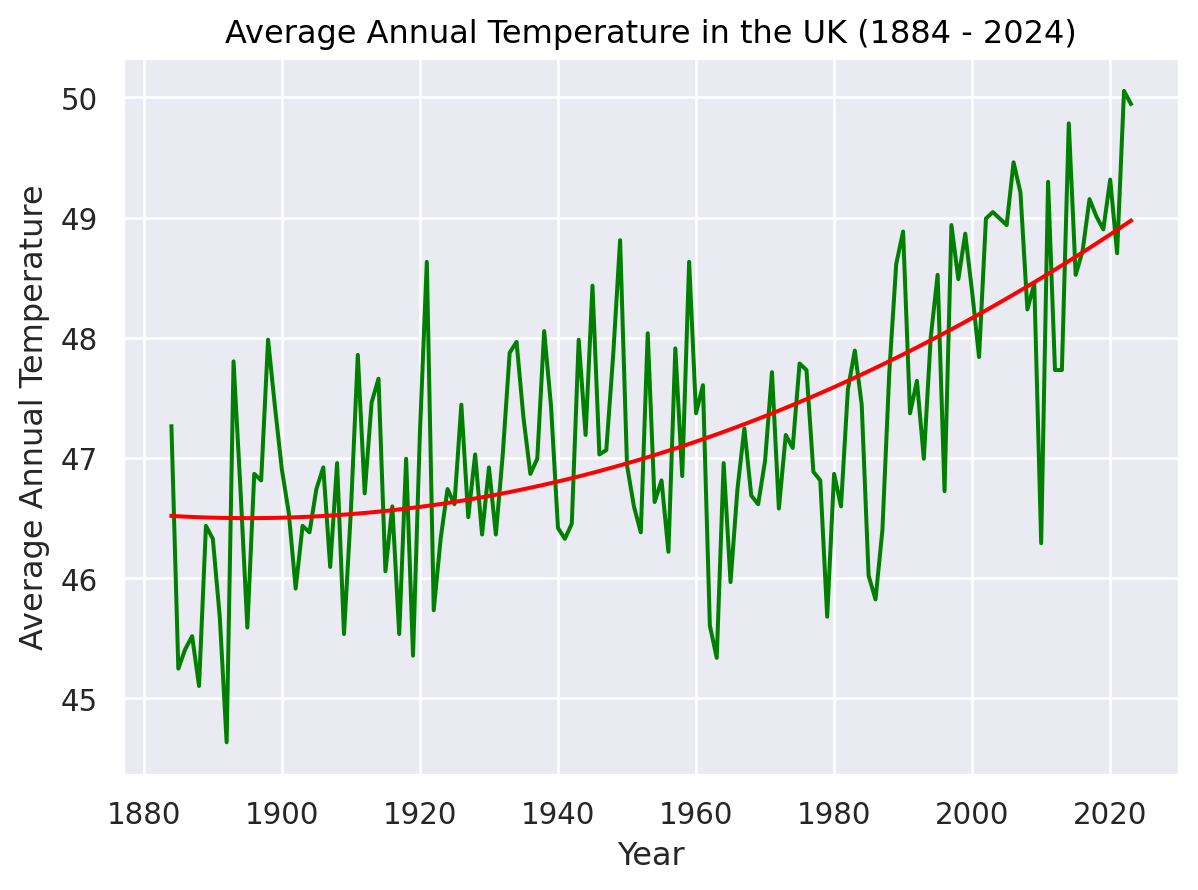

In [20]:
(
    so.Plot(temp_fahrenheit, x = "year", y = "annual")
    .add(so.Lines(color="green"))
    .add(so.Lines(color="red"), so.PolyFit())
    .label(x="Year", y="Average Annual Temperature", title = "Average Annual Temperature in the UK (1884 - 2024)")
)

### Analysis

Climate change has also caused shifts in butterfly geographic ranges. In the UK, warmer temperatures enable species like the Comma butterfly to expand northward, while cooler-adapted species, such as the Mountain Ringlet, face habitat loss and population decline. Warming temperatures impact the timing of butterfly life events (phenology), causing earlier spring emergences. This can create mismatches between butterflies and their host plants or nectar sources, disrupting their survival. Additionally, habitat suitability is affected by rising temperatures and extreme weather events like droughts and heatwaves, which degrade critical butterfly habitats such as grasslands and woodlands.

Warming trends provide both opportunities and challenges, depending on species-specific adaptability. Migratory species like the Red Admiral benefit from milder winters, while habitat-restricted species face greater risks. Temperature data reveals a warming trend over the decades, with annual averages increasing. This has a dual effect on butterfly populations:

Positive Effects:

- Warmer temperatures extend the breeding season for species like the Small White and Peacock.

- Increased overwintering success for Red Admiral in southern UK regions.

Negative Effects:

- Extreme heat events or unseasonable temperature fluctuations can disrupt life cycles, particularly in species with specific seasonal emergence patterns.

- Temperature-linked habitat shifts force some populations to migrate or decline in unfavorable conditions.

The warming trends indicated in your graph have significant scientific implications for UK butterflies. While some species benefit by expanding their ranges or producing more generations annually, others suffer due to habitat loss, phenological mismatches, or overheating in their microhabitats. Butterfly populations serve as sensitive indicators of environmental change, making them crucial for understanding the broader impacts of climate change on ecosystems.

# Conclusion

### Summary of Findings 
The analysis of UK butterfly populations highlights clear links between environmental changes and population trends. Urbanization has contributed to habitat degradation, leading to declines in species like the Common Blue, which depend on urban environments. Temperature trends reveal mixed impacts: while warmer climates have extended breeding seasons for some species and allowed others, like the Red Admiral, to overwinter in southern regions, extreme weather and habitat loss have negatively affected cooler-adapted species. Together, these findings demonstrate how urbanization and warming temperatures are shaping butterfly populations and the ecosystems they support.

### Implications & Scientific Context
The observed trends emphasize the role of butterflies as key ecological indicators, offering insights into broader environmental changes. Warming temperatures and habitat loss are altering ecological processes in the UK, with implications for biodiversity, ecosystem stability, and the agricultural sector. Declining butterfly populations could disrupt pollination networks, impacting crop yields and economic stability. These patterns are not confined to the UK; rather, they reflect global challenges, as habitat degradation and climate change are influencing pollinators and ecosystems worldwide. Understanding these dynamics is crucial for addressing the interconnected effects of migration, pollution, and global warming on pollinator behavior and ecosystem health.

### Uncertainty & Unresolved Issues
While the UK Butterfly Monitoring Scheme provides valuable population data, its reliance on crowd-sourced observations introduces potential biases that may limit its accuracy. Addressing these limitations requires standardizing data collection methods and expanding studies to include global butterfly populations. Specifically, research on migratory butterfly species could shed light on how changing climate patterns are affecting migration distances, routes, and destinations. Future studies should also explore whether these shifts are leading to adaptive changes or further declines.

Ultimately, these findings highlight the need to protect natural habitats, mitigate the impacts of climate change, and balance urban development with ecological sustainability to support butterfly populations and the critical roles they play in maintaining resilient ecosystems.

## AI Acknowledgment 

In this notebook, we made use of Claude and ChatGPT in the following capacities:

1. Supplement gaps in coding knowledge
2. Troubleshoot error messages
3. Provide a starting point for scientific research on butterflies and ecology

Overall, use of these AI models proved useful but not always fruitful. It sped up the process for researching documentation for functions belonging to different packages and providing skeleton code for performing data analyses that we were unfamiliar with, however underperformed when it came to troubleshooting error messages. 

With respect to providing direction for scientific research, models like ChatGPT proved useful for pointing us in the right direction. It provided us with resources to further investigate in order to learn more about butterflies and their ecological role as well as what research had already been done by way of analyzing population fluctuations and their broader implications. 

Overall, AI proved useful at various stages of this project. It served as a useful resource to turn to for supplmenting knowledge gaps in both coding and environmental sciences concepts. However, it is important to fact check and fine tune queries such that the models are returning accurate and useful information. In other words, these models are helpful when used precisely and judiciously. 